In [1]:
import numpy as np
#uncomment this next line if h5py is not installed
#!pip3 install h5py
import h5py

In [2]:
dataset_path = 'project_datasets/'
A01T = h5py.File(dataset_path + 'A01T_slice.mat', 'r')
X = np.copy(A01T['image'])
y = np.copy(A01T['type'])
y = y[0,0:X.shape[0]:1]
y = np.asarray(y, dtype=np.int32)

In [5]:
print(X.shape)
print(y.shape)

(288, 25, 1000)
(288,)


In [6]:
single_trial_data, single_trial_label = X[0], y[0]

In [7]:
print(single_trial_data[0][0])

6.298828125


In [24]:
A02T = h5py.File(dataset_path + 'A02T_slice.mat', 'r')
X2 = np.copy(A02T['image'])
y2 = np.copy(A02T['type'])
y2 = y2[0,0:X2.shape[0]:1]
y2 = np.asarray(y2, dtype=np.int32)
print(X2.shape, y2.shape)

(288, 25, 1000) (288,)


In [23]:
ex, ey = X2[0], y2[0]
print(ex[0][0], ey)

17.822265625 769


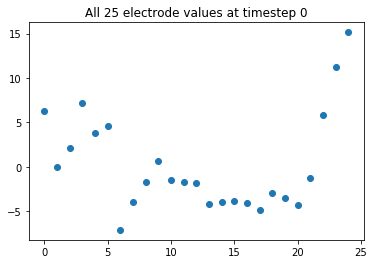

In [10]:
single_trial = X[0]
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('All 25 electrode values at timestep 0')
plt.scatter(range(0, 25), single_trial[:, 0])


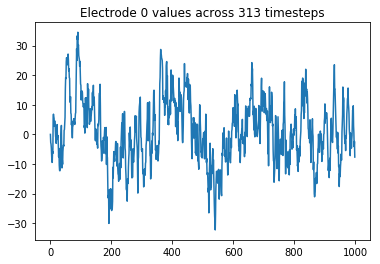

In [13]:
single_electrode = single_trial[1]
single_electrode.shape
plt.title('Electrode 0 values across 313 timesteps')
plt.plot(range(0, single_electrode.shape[0]), single_electrode)

In [19]:
def smooth_signal(signal, kaiser_window_parameter = 8, window_len = 20):
    # convolves kernel over the signal to smoothen it
    # returns a filtered version of kernel 
    append_top = signal[window_len -1 : 0 : -1]
    append_bottom = signal[-1: -window_len: -1]
    sig = np.r_[append_top, signal, append_bottom]
    kaiser_window = np.kaiser(window_len, kaiser_window_parameter)
    scaled_kaiser_window = kaiser_window/kaiser_window.sum()
    #valid tells us not to do any additional padding 
    smoothed = np.convolve(scaled_kaiser_window, sig, mode = "valid")
    return smoothed

In [20]:
smoothed = smooth_signal(single_electrode, kaiser_window_parameter = 2)

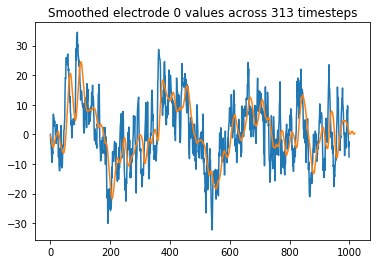

In [21]:
plt.title('Smoothed electrode 0 values across 313 timesteps')
plt.plot(range(0, single_electrode.shape[0]), single_electrode)
plt.plot(smoothed)
plt.show()